<a href="https://colab.research.google.com/github/chevvakavitha/Customer-Churn-Analysis-with-Feature-Engineering-and-Predictive-Modeling/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Churn Analysis with Feature Engineering and Predictive Modeling

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Load dataset (replace with actual file path)
customer_churn_data = pd.read_csv('customer_churn.csv')

1. Data Preprocessing

In [ ]:
# Handle missing values for numeric features only
for column in customer_churn_data.select_dtypes(include=np.number).columns:
    customer_churn_data[column].fillna(customer_churn_data[column].mean(), inplace=True)

# Handle missing values for categorical features using mode
for column in customer_churn_data.select_dtypes(exclude=np.number).columns:
    customer_churn_data[column].fillna(customer_churn_data[column].mode()[0], inplace=True)

<ipython-input-4-8613d93ff25b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_churn_data[column].fillna(customer_churn_data[column].mean(), inplace=True)
<ipython-input-4-8613d93ff25b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [ ]:
# Convert 'Churn' column to numerical values (Yes=1, No=0)
# Check if the column name is 'Churn' instead of 'churn'
customer_churn_data['churn'] = customer_churn_data['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
# Feature Engineering: Creating a new column for total charges as tenure * monthly charges
# Check if 'monthly_charges' exists, if not try variations
if 'monthly_charges' in customer_churn_data.columns:
    # This line was missing indentation
    customer_churn_data['total_charges'] = customer_churn_data['tenure'] * customer_churn_data['monthly_charges']
elif 'MonthlyCharges' in customer_churn_data.columns:
    customer_churn_data['total_charges'] = customer_churn_data['tenure'] * customer_churn_data['MonthlyCharges']

2. Exploratory Data Analysis (EDA)

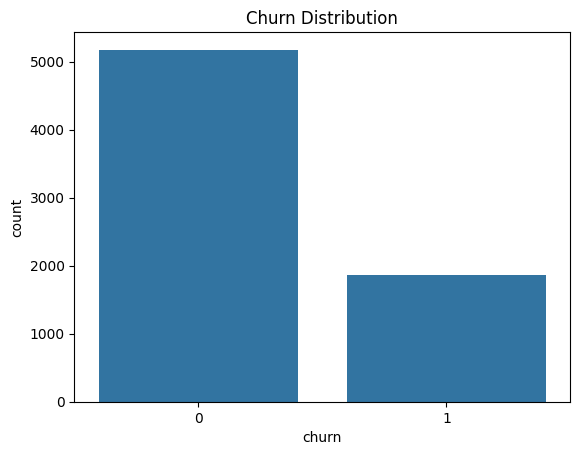

In [ ]:
# Visualizing the distribution of churn
sns.countplot(x='churn', data=customer_churn_data)
plt.title('Churn Distribution')
plt.show()

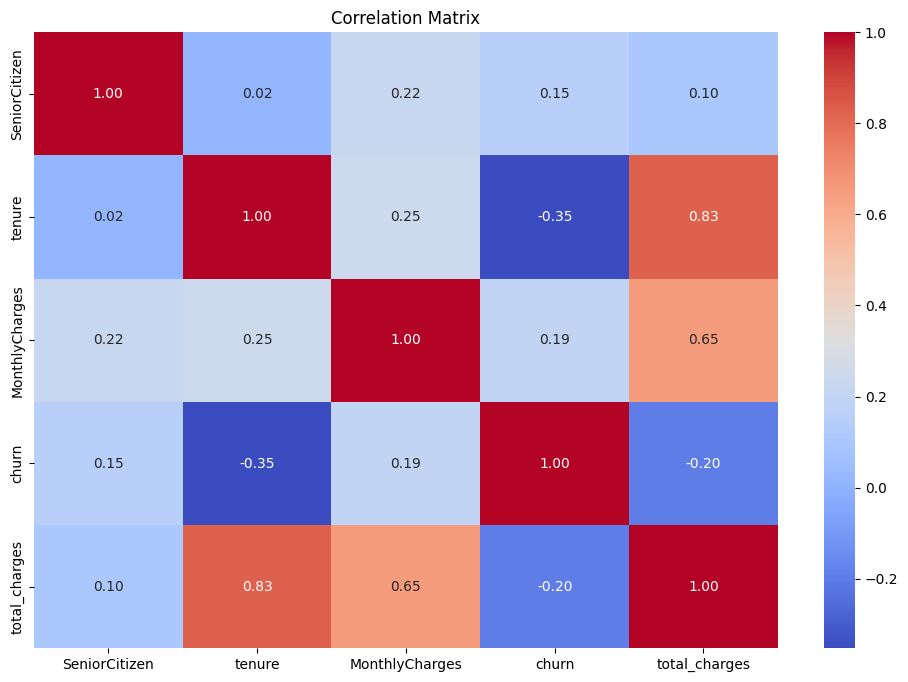

In [ ]:
# Visualizing correlation matrix to identify relationships between features
plt.figure(figsize=(12, 8))
# Include numeric_only=True to only calculate correlations for numeric columns
sns.heatmap(customer_churn_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

3. Feature Selection

In [ ]:
# Select features for predictive modeling
# Updated feature names to match the actual column names in the dataset
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'PaymentMethod', 'Contract']
X = customer_churn_data[features]

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Target variable (Churn)
y = customer_churn_data['churn']


 4. Train/Test Split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


5. Building and Evaluating a Model

In [ ]:
# Using Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation Metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7889256980596309

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1539
           1       0.68      0.42      0.52       574

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113



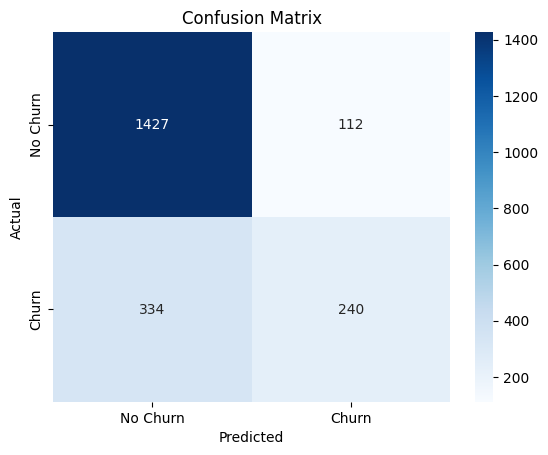

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

6. Feature Importance

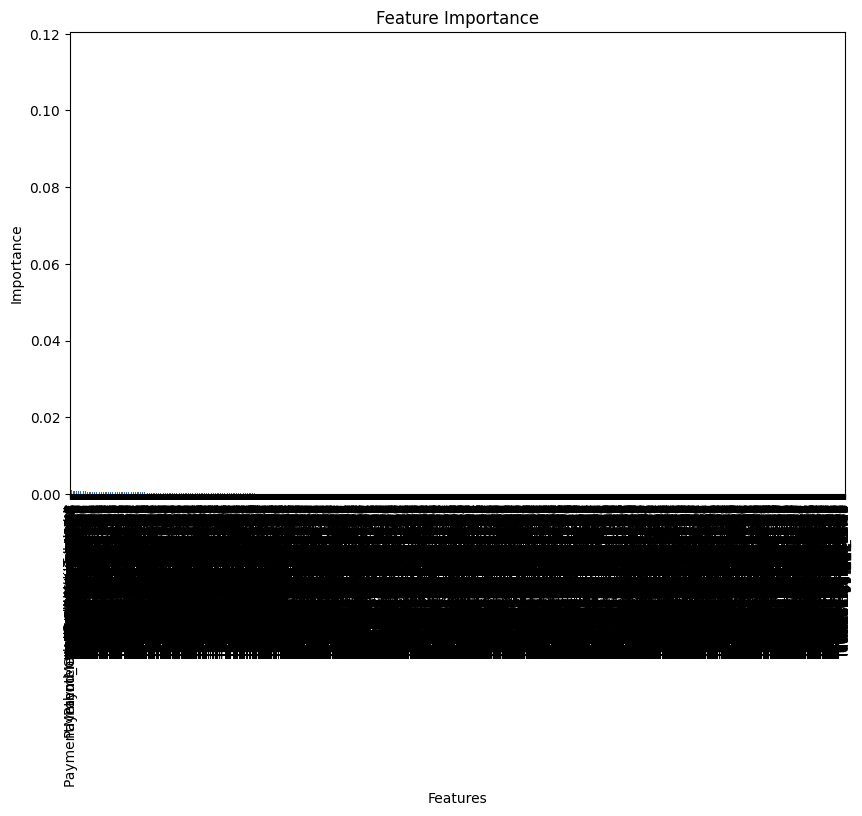

In [ ]:
# Display feature importances from the Random Forest model
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

 7. Advanced Insights

In [ ]:
# Extracting all customers whose tenure is greater than 50 months and churned
long_term_churned = customer_churn_data[(customer_churn_data['tenure'] > 50) & (customer_churn_data['churn'] == 1)]


In [ ]:
# Grouping customers by payment method and calculating churn rates
# Changed 'payment_method' to 'PaymentMethod' to match the actual column name
churn_by_payment = customer_churn_data.groupby('PaymentMethod')['churn'].mean()

In [ ]:
# Show customers with high monthly charges but low tenure (potential early churn risks)
early_churn_risk = customer_churn_data[(customer_churn_data['MonthlyCharges'] > 100) & (customer_churn_data['tenure'] < 12)]

In [ ]:
# Output insights
print("\nLong-term churned customers (tenure > 50 months and churned):")
print(long_term_churned.head())

print("\nChurn rate by payment method:")
print(churn_by_payment)

print("\nEarly churn risk (high charges, low tenure):")
print(early_churn_risk.head())


Long-term churned customers (tenure > 50 months and churned):
     customerID  gender  SeniorCitizen Partner Dependents  tenure  \
104  3192-NQECA    Male              0     Yes         No      68   
110  0486-HECZI    Male              0     Yes         No      55   
168  3445-HXXGF    Male              1     Yes         No      58   
173  0691-JVSYA  Female              0     Yes         No      53   
268  6323-AYBRX    Male              0      No         No      59   

    PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
104          Yes               Yes     Fiber optic                   No  ...   
110          Yes               Yes     Fiber optic                  Yes  ...   
168           No  No phone service             DSL                   No  ...   
173          Yes                No     Fiber optic                   No  ...   
268          Yes                No              No  No internet service  ...   

             StreamingTV      StreamingMo

8. Saving the Model

In [ ]:
# Save the trained model for future use (optional)
import joblib
joblib.dump(model, 'random_forest_churn_model.pkl')

print("\nModel saved as 'random_forest_churn_model.pkl'")


Model saved as 'random_forest_churn_model.pkl'


1. Churn Rate Analysis

Churn Rate Analysis:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


<ipython-input-42-cc1ac8cab67a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=customer_churn_data, palette='coolwarm')


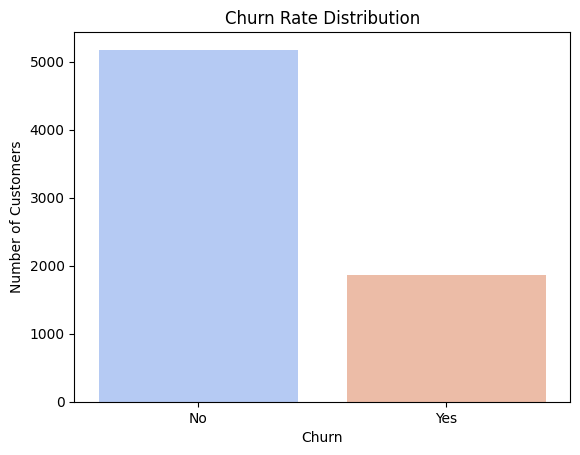

In [ ]:
# Calculate churn rate
# Changed 'data' to 'customer_churn_data'
churn_rate = customer_churn_data['Churn'].value_counts(normalize=True) * 100
print("Churn Rate Analysis:\n", churn_rate)

# Visualization
# Changed 'data' to 'customer_churn_data'
sns.countplot(x='Churn', data=customer_churn_data, palette='coolwarm')
plt.title("Churn Rate Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Churn")
plt.show()

2. Payment Method vs. Churn

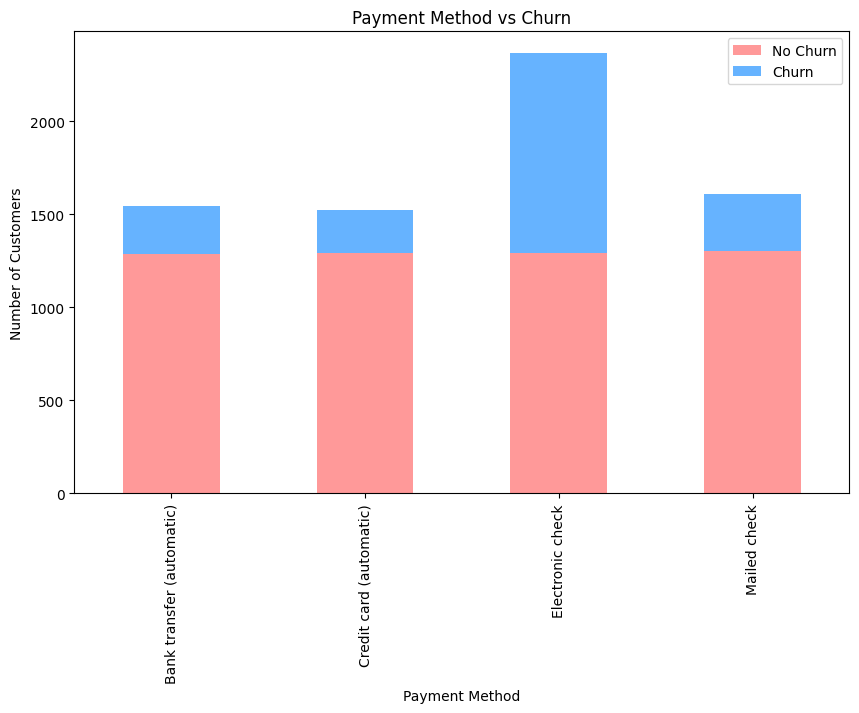

In [ ]:
# Group by PaymentMethod and Churn
# Changed 'data' to 'customer_churn_data' to match the DataFrame used earlier
payment_churn = customer_churn_data.groupby(['PaymentMethod', 'Churn'])['Churn'].count().unstack()
payment_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B3FF'])
plt.title("Payment Method vs Churn")
plt.ylabel("Number of Customers")
plt.xlabel("Payment Method")
plt.legend(["No Churn", "Churn"])
plt.show()

3. Monthly Charges Distribution

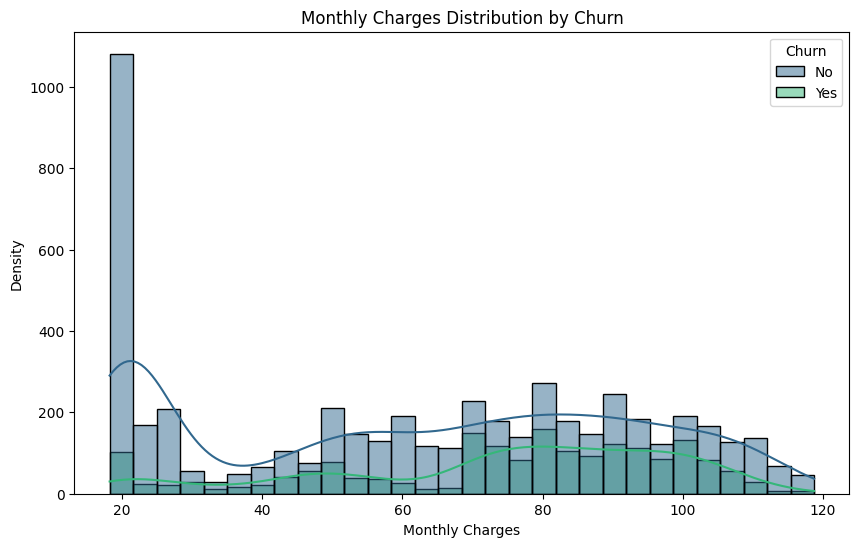

In [ ]:
# Distribution of Monthly Charges
plt.figure(figsize=(10, 6))
# Changed 'data' to 'customer_churn_data' to match the DataFrame used earlier
sns.histplot(customer_churn_data, x='MonthlyCharges', hue='Churn', kde=True, palette='viridis', bins=30)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

4. Contract Type and Churn

Churn Rate by Contract Type:
 Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


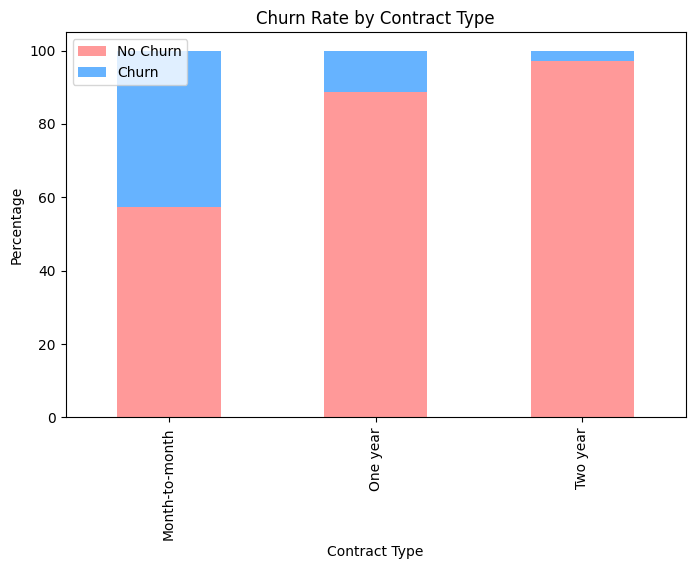

In [ ]:
# Churn Rate by Contract Type
# Changed 'data' to 'customer_churn_data' to match the DataFrame used earlier
contract_churn = customer_churn_data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print("Churn Rate by Contract Type:\n", contract_churn)

# Visualization
contract_churn.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#FF9999', '#66B3FF'])
plt.title("Churn Rate by Contract Type")
plt.ylabel("Percentage")
plt.xlabel("Contract Type")
plt.legend(["No Churn", "Churn"])
plt.show()

5. Tenure Analysis

<ipython-input-50-a3ee355a7758>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=customer_churn_data, palette='Set2')


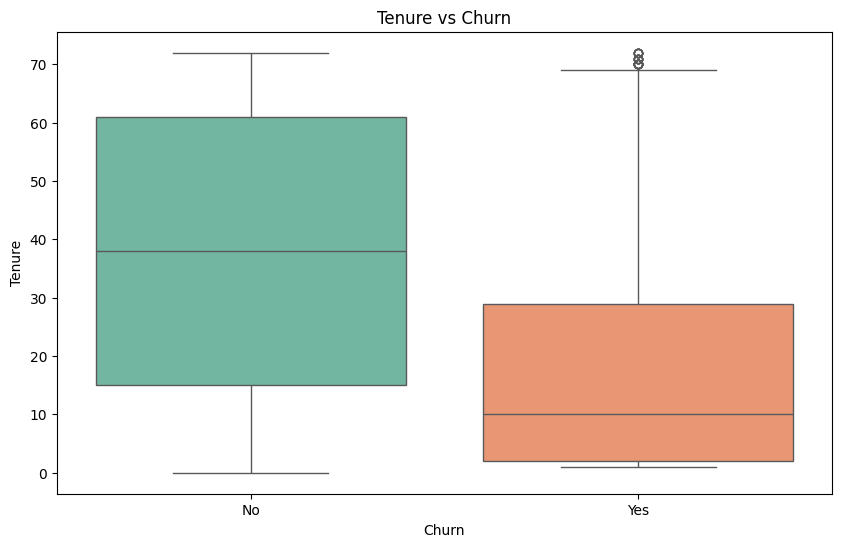

In [ ]:
# Tenure vs Churn
plt.figure(figsize=(10, 6))
# Changed 'data' to 'customer_churn_data' to match the DataFrame used earlier
sns.boxplot(x='Churn', y='tenure', data=customer_churn_data, palette='Set2')
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

6. Senior Citizens and Churn

Senior Citizens Churn Rate:
 Churn
No     58.318739
Yes    41.681261
Name: proportion, dtype: float64


<ipython-input-52-ebc247e836dd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=customer_churn_data[customer_churn_data['SeniorCitizen'] == 1], palette='coolwarm')


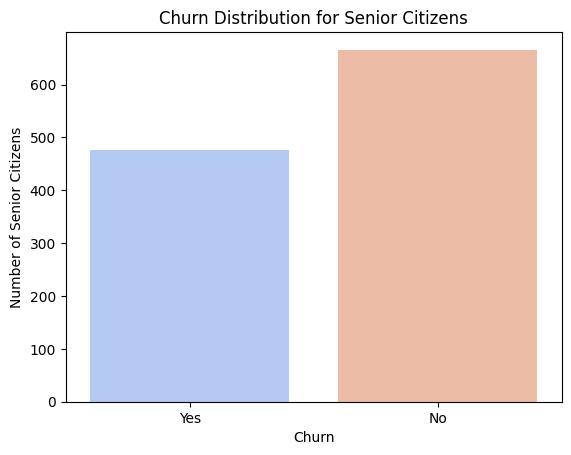

In [ ]:
# Senior Citizens and Churn
# Replaced 'data' with 'customer_churn_data' to match the DataFrame used earlier
senior_churn = customer_churn_data[customer_churn_data['SeniorCitizen'] == 1]['Churn'].value_counts(normalize=True) * 100
print("Senior Citizens Churn Rate:\n", senior_churn)

# Visualization
# Replaced 'data' with 'customer_churn_data' to match the DataFrame used earlier
sns.countplot(x='Churn', data=customer_churn_data[customer_churn_data['SeniorCitizen'] == 1], palette='coolwarm')
plt.title("Churn Distribution for Senior Citizens")
plt.ylabel("Number of Senior Citizens")
plt.xlabel("Churn")
plt.show()

7. Correlation Analysis

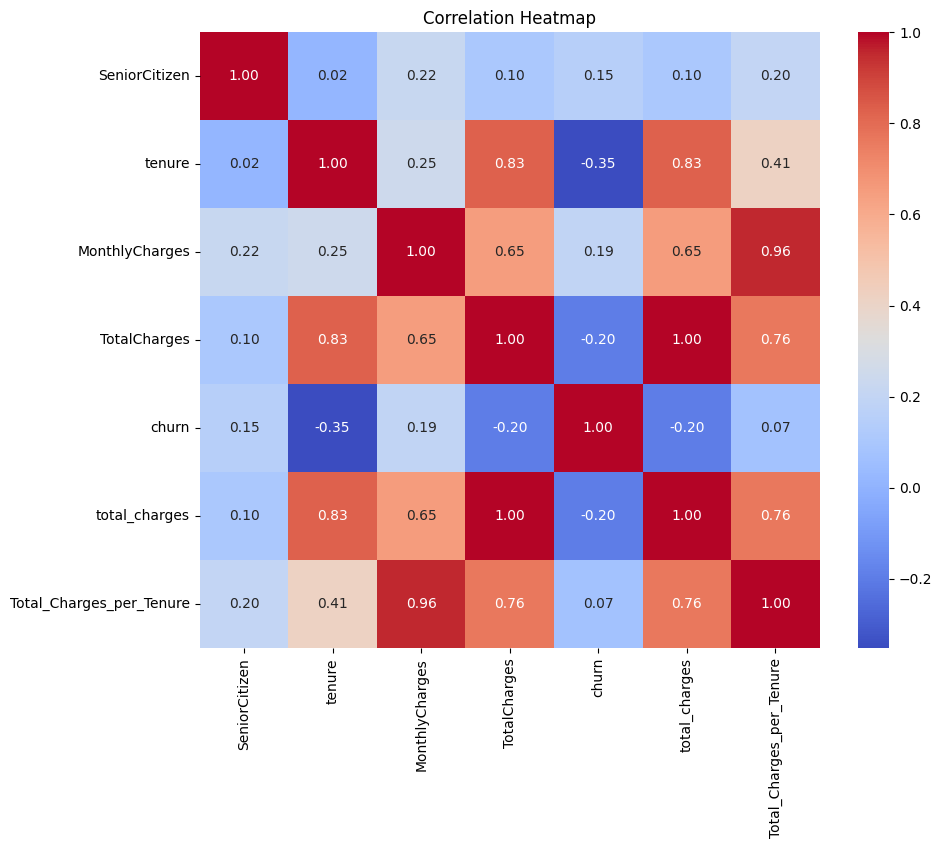

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
# Changed 'data' to 'customer_churn_data' to match the DataFrame used earlier
# Include numeric_only=True to only calculate correlations for numeric columns
correlation = customer_churn_data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()